### Score: `[103.5]`

Q1. `[4.5+11+10]` Good job! 考虑很细致，第一题注意一下变量信息即可

Q2. `[11]` Very good job!

Q3. `[5.5+5+5.5+5.5+5 +5+5.5+4+4+5.5]` Good job! 有点小问题查看一下注释

Q4. `[5.5+5.5+5.5]` 很好的分析！


各题批注用`### Note`给出，请自行查阅。

# Assignment 02 —— by Jie Ou (ID : 12432886)

# 1. Significant earthquakes since 2150 B.C. der.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
# %matplotlib inline

In [3]:
# 读取并剔除第一行第一列的空数据
Sig_Eqs = pd.read_csv('earthquakes-2024-10-26_20-20-14_+0800.tsv',sep='\t').iloc[1:,1:]
Sig_Eqs

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
1,-2150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",31.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA: UGARIT,35.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,38.000,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE: THERA ISLAND (SANTORINI),36.400,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,-1566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ISRAEL: ARIHA (JERICHO),31.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,2024.0,8.0,8.0,7.0,42.0,55.0,5922.0,NaN,JAPAN: MIYAZAKI,31.719,...,NaN,NaN,14.0,1.0,NaN,1.0,1.0,1.0,2.0,1.0
6440,2024.0,8.0,17.0,19.0,10.0,26.0,5923.0,7571.0,RUSSIA: OFF KAMCHATKA,52.924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6441,2024.0,9.0,18.0,2.0,41.0,6.0,NaN,NaN,INDONESIA: JAVA: BANDUNG,-7.240,...,NaN,NaN,75.0,2.0,NaN,3.0,NaN,NaN,700.0,3.0
6442,2024.0,9.0,23.0,23.0,14.0,19.0,5938.0,NaN,JAPAN: IZU ISLANDS,31.546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.1  Compute the total number of deaths and print the top 20 countries.

### Step 1：数据预处理及清洗

In [5]:
# 将 Location Name “：”前国家名提取出来（如果没有“：”，即表示只列出国家名）
Sig_Eqs['Country'] = Sig_Eqs['Location Name'].str.split(':').str[0]
# 将国家及地震死亡信息提取出来
Sig_Eqs_Death = Sig_Eqs[['Country','Deaths','Death Description']]
Sig_Eqs_Death

### Note: 变量应选择Total_Deaths
'''
从数据界面可以看到数据标签的详细注释
Deaths: Whenever possible, numbers of deaths are listed.
Total Deaths: Whenever possible, total number of deaths from the earthquake and secondary effects are listed.
'''

,Country,Deaths,Death Description
1,JORDAN,NaN,NaN
2,SYRIA,NaN,3.0
3,TURKMENISTAN,1.0,1.0
4,GREECE,NaN,NaN
5,ISRAEL,NaN,NaN
...,...,...,...
6439,JAPAN,NaN,NaN
6440,RUSSIA,NaN,NaN
6441,INDONESIA,1.0,1.0
6442,JAPAN,NaN,NaN


In [7]:
# 经过观察，部分数据仅有'Death Description'，而缺少死亡人数的数据，对此类数据依据按下述赋值
# 数据中 Death Description 仅有 1.0、2.0、3.0、4.0
# 0.0——0，赋值 0
# 1.0——Few (~1 to 50 deaths)，赋值 25
# 2.0——Some (~51 to 100 deaths)，赋值 75
# 3.0——Many (~101 to 1000 deaths)，赋值 500
# 4.0——Very many (over 1000 deaths)，赋值 5000
Sig_Eqs_Death = Sig_Eqs_Death[Sig_Eqs_Death['Death Description'].notna()]  # 将有伤亡的数据提取出来
Sig_Eqs_Death.loc[(Sig_Eqs_Death['Deaths'].isna()) & (Sig_Eqs_Death['Death Description']==0.0),'Deaths'] = 0
Sig_Eqs_Death.loc[(Sig_Eqs_Death['Deaths'].isna()) & (Sig_Eqs_Death['Death Description']==1.0),'Deaths'] = 25
Sig_Eqs_Death.loc[(Sig_Eqs_Death['Deaths'].isna()) & (Sig_Eqs_Death['Death Description']==2.0),'Deaths'] = 75
Sig_Eqs_Death.loc[(Sig_Eqs_Death['Deaths'].isna()) & (Sig_Eqs_Death['Death Description']==3.0),'Deaths'] = 500
Sig_Eqs_Death.loc[(Sig_Eqs_Death['Deaths'].isna()) & (Sig_Eqs_Death['Death Description']==4.0),'Deaths'] = 5000
Sig_Eqs_Death_up = Sig_Eqs_Death[['Country','Deaths']]
Sig_Eqs_Death_up

,Country,Deaths
2,SYRIA,500.0
3,TURKMENISTAN,1.0
17,GREECE,2500.0
19,GREECE,500.0
27,GREECE,25.0
...,...,...
6434,PAPUA NEW GUINEA,5.0
6435,TAIWAN,18.0
6436,IRAN,4.0
6438,CHILE,1.0


In [9]:
# 通过观察能发现'Country'数据中国家的表示方式并不统一，格式比较杂乱，因此要对数据进行筛选
Spe_Death_up = Sig_Eqs_Death_up[Sig_Eqs_Death_up['Country'].str.contains(r'[^a-zA-Z ]+')] #查看除了以字母和空格符组成的Country国家有哪些形式
Spe_Death_up

,Country,Deaths
192,SYRIA; ISRAEL; ASIA,500.0
216,AFGHANISTAN; INDIA,500.0
241,TURKEY; ARMENIA,12000.0
246,TURKEY; ARMENIA,500.0
293,IRAN-IRAQ,16000.0
...,...,...
6050,MYANMAR (BURMA),4.0
6089,MYANMAR (BURMA),2.0
6149,AFGHANISTAN; PAKISTAN,2.0
6394,TURKEY; SYRIA,6.0


In [11]:
# 部分列中以';'或'-'分隔多个国家，将其分成仅含有单个国家的列，Deaths平均分给对应 Country 中的几个国家
def split_countries(row):
    if ';' in row['Country']:
        countries = row['Country'].split(';')
    else:
        countries = row['Country'].split('-')
    num_countries = len(countries)
    average_deaths = round(row['Deaths'] / num_countries)
    return pd.DataFrame([{'Country':country,'Deaths':average_deaths} for country in countries])
Spe_Death_up_split = pd.concat([split_countries(row) for _,row in Spe_Death_up.iterrows()],ignore_index=True)
Spe_Death_up_split

,Country,Deaths
0,SYRIA,167
1,ISRAEL,167
2,ASIA,167
3,AFGHANISTAN,250
4,INDIA,250
...,...,...
133,AFGHANISTAN,1
134,PAKISTAN,1
135,TURKEY,3
136,SYRIA,3


In [13]:
# 将 Country 含特殊字符处理好的数据与 Country 不含特殊字符的数据合并
Sig_Eqs_Death_total_1 = pd.concat([Sig_Eqs_Death_up[~Sig_Eqs_Death_up['Country'].str.contains(r'[^a-zA-Z ]+')],Spe_Death_up_split],ignore_index=True)
# Country中还有部分国家有两个名称，用 () 表示，为避免有的行仅有一个名称，将其统一成一个称呼
Sig_Eqs_Death_total_1[Sig_Eqs_Death_total_1['Country'].str.contains(r'\(')]

,Country,Deaths
2617,MYANMAR (BURMA),400.0
2627,MYANMAR (BURMA),25.0
2635,MYANMAR (BURMA),500.0
2636,MYANMAR (BURMA),50.0
2637,MYANMAR (BURMA),36.0
2654,MYANMAR (BURMA),38.0
2677,MYANMAR (BURMA),1.0
2693,MYANMAR (BURMA),2.0
2709,MYANMAR (BURMA),1.0
2710,MYANMAR (BURMA),26.0


In [15]:
# 将含有MYANMAR or BURMA or MYANMAR (BURMA) 的行，统一表达为 MYANMAR
Sig_Eqs_Death_total_1['Country'] = Sig_Eqs_Death_total_1['Country'].replace(['MYANMAR', 'BURMA', 'MYANMAR (BURMA)'], 'MYANMAR')

# 检查是否还有特殊的Country列
Sig_Eqs_Death_total_1[Sig_Eqs_Death_total_1['Country'].str.contains(r'[^a-zA-Z ]+')]

,Country,Deaths
2602,"TOKAIDO, JAPAN",500.0
2609,"SEIONAIKAI, JAPAN",1000.0
2614,"BARBADOS, SAINT VINCENT, DOMINICA, ANTIGUA",3000.0
2618,SW. SUMATRA,500.0
2619,S. MEXICO,1.0
2630,"W. LUZON ISLAND, PHILIPPINES",17.0
2676,"SAN CRISTOBAL, VENEZUELA",0.0
2713,"GREECE, TURKEY",3.0


In [17]:
# SW. SUMATRA、S. MEXICO无需处理
# ‘TOKAIDO, JAPAN’、‘SEIONAIKAI, JAPAN’ 统一表达为 JAPAN
# ‘W. LUZON ISLAND, PHILIPPINES’ 改为 PHILIPPINES
# ‘SAN CRISTOBAL, VENEZUELA’ 改为 VENEZUELA
# 利用正则表达实现不完全匹配，以免国家字符前后存在空格符
Sig_Eqs_Death_total_1['Country'] = Sig_Eqs_Death_total_1['Country'].replace('TOKAIDO, JAPAN|SEIONAIKAI, JAPAN', 'JAPAN',regex=True)
Sig_Eqs_Death_total_1['Country'] = Sig_Eqs_Death_total_1['Country'].replace('W. LUZON ISLAND, PHILIPPINES', 'PHILIPPINES',regex=True)
Sig_Eqs_Death_total_1['Country'] = Sig_Eqs_Death_total_1['Country'].replace('SAN CRISTOBAL, VENEZUELA' , 'VENEZUELA',regex=True)

# ‘BARBADOS, SAINT VINCENT, DOMINICA, ANTIGUA’ 和 ‘GREECE, TURKEY’执行将多个国家名分割的函数
a = Sig_Eqs_Death_total_1[Sig_Eqs_Death_total_1['Country'].str.contains(r'[^a-zA-Z .]+')]  #含特殊字符串的国家名
b = Sig_Eqs_Death_total_1[~Sig_Eqs_Death_total_1['Country'].str.contains(r'[^a-zA-Z .]+')] #不含特殊字符串的国家名
def split_countries_dou(row):
    if ',' in row['Country']:
        countries = row['Country'].split(',')
    else:
        countries = row['Country']
    num_countries = len(countries)
    average_deaths = round(row['Deaths'] / num_countries)
    return pd.DataFrame([{'Country':country,'Deaths':average_deaths} for country in countries])
a = pd.concat([split_countries_dou(row) for _,row in a.iterrows()],ignore_index=True)  # 处理好的字符串
Sig_Eqs_Death_total = pd.concat([a,b],ignore_index=True)

# 检查是否还有特殊的Country列
Sig_Eqs_Death_total[Sig_Eqs_Death_total['Country'].str.contains(r'[^a-zA-Z .]+')]

,Country,Deaths


In [19]:
Sig_Eqs_Death_total  # 经过Step1：数据预处理及清洗过的数据

,Country,Deaths
0,BARBADOS,750.0
1,SAINT VINCENT,750.0
2,DOMINICA,750.0
3,ANTIGUA,750.0
4,GREECE,2.0
...,...,...
2724,AFGHANISTAN,1.0
2725,PAKISTAN,1.0
2726,TURKEY,3.0
2727,SYRIA,3.0


### Step2：分组合并统计各个国家地震造成的死亡数

In [21]:
# 分组后排序，并展示死亡数最高的二十个国家情况
Sig_Eqs_Death_total.groupby('Country').sum().sort_values(by='Deaths')[-1:-21:-1]

,Deaths
Country,
CHINA,2144987.0
TURKEY,1181181.0
IRAN,1034955.0
ITALY,505643.0
SYRIA,385641.0
HAITI,323478.0
AZERBAIJAN,317719.0
JAPAN,285232.0
ARMENIA,191902.0


## 1.2 Annual Earthquake Magnitude Analysis

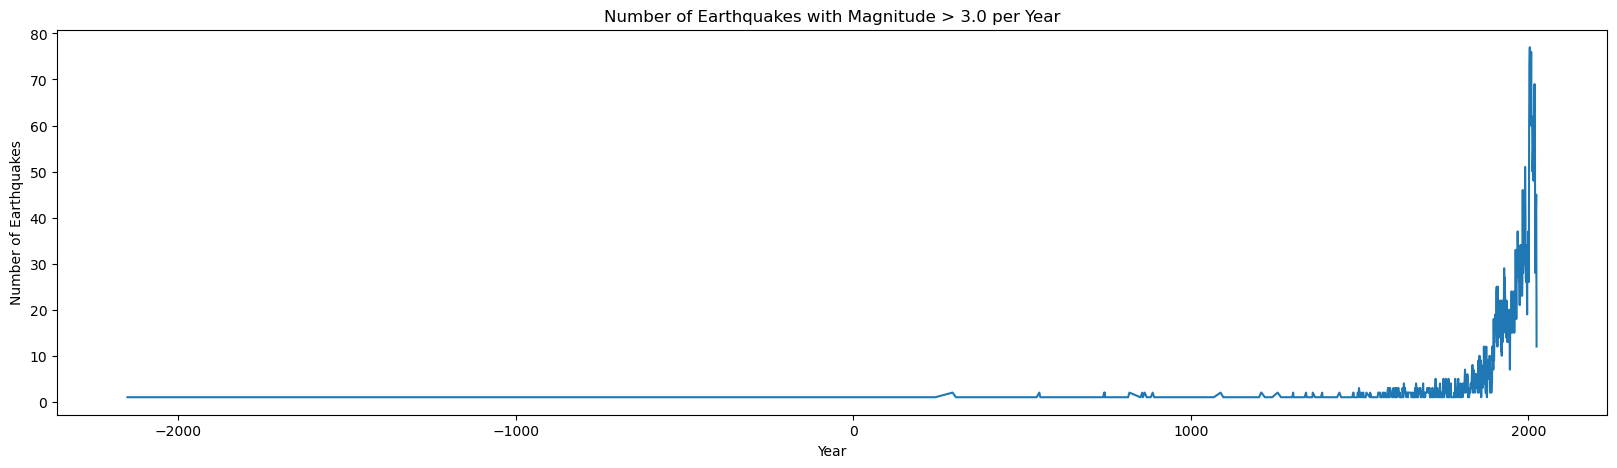

In [23]:
Eqs_mag_per_year = Sig_Eqs[['Year','Mag']][ Sig_Eqs[['Year','Mag']]['Mag'] > 3.0 ].groupby(by = 'Year').size()

plt.figure(figsize=(20,5))
Eqs_mag_per_year.plot()
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes with Magnitude > 3.0 per Year')
plt.show()
# 该图约1500年前统计的地震数比较平缓，均不高于5，后半段数据显示出了明显波动

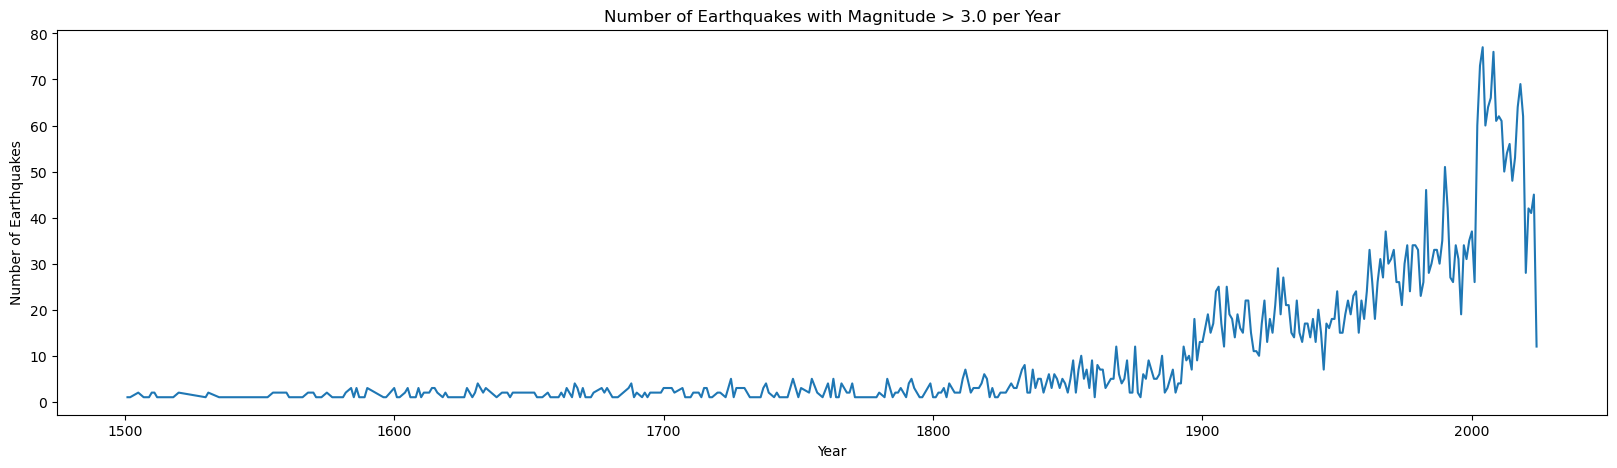

In [25]:
# 为更加清楚展现后半段数据的波动情况，将1500年以后的地震数进行绘图
plt.figure(figsize=(20,5))
Eqs_mag_per_year[Eqs_mag_per_year.index > 1500].plot()
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes with Magnitude > 3.0 per Year')
plt.show()

趋势：从图像中可以看出，地震数量在20世纪之后显著增加。

解释：虽然图像显示了地震数量的增加趋势，但这种趋势并不反映地震活动的实际增加。这种增加主要是由于地震检测和记录技术的快速进步，使我们能更加详尽地记录地震数据。最初，由于仪器灵敏度的限制，我们只能检测到震级较大的地震事件。直到19世纪末，我们才拥有了能够测量地震波的校准仪器。随着技术的发展，我们对地震的检测能力得到了极大的提升，从而使得记录到的地震数量显著增加。


## 1.3 CountEq_LargestEq function 

### Step1：定义函数

In [27]:
def CountEq_LargestEq(Country,Eqs): # 传入国家和地震的数据
    # 剔除没有记录‘Location Name’的数据
    Eqs = Eqs[Eqs['Location Name'].notna()]
    Country_Sig_Eqs = Eqs[['Year','Mo','Dy','Hr','Mn','Sec','Location Name','Mag','Country']][Eqs['Country'].str.contains(Country,regex=False)]
    Country_num_eqs = Country_Sig_Eqs.shape[0]
    # 找到一个或多个最大值对应的index
    if Country_num_eqs == 1:
        # 由于仅检索到一行数据，因此本身即使最大的地震
        index_list = [Country_Sig_Eqs.index[0]] # 如果仅存在一个index，需将其变为列表
    else:
        if pd.isna(Country_Sig_Eqs['Mag'].max()):       # 避免['Mag']均为NaN的情况
            index_list = Country_Sig_Eqs.index
        else:
            index_list = Country_Sig_Eqs[Country_Sig_Eqs['Mag'] == Country_Sig_Eqs['Mag'].max()].index
    ls = [] #储存多个最大震级index对应的地点和时间
    for index in index_list:
        new_df = Country_Sig_Eqs.loc[[index]] # 暂时创建index对应行的Dataframe
        
        # 日期格式：%Y-%m-%d %H:%M:%S.%f。若不存在%m，则仅使用年；若不存在%d，则仅使用年-月 ...
        if pd.isna(new_df['Mo'].item()):
            time = str(int(new_df['Year']))
        elif pd.isna(new_df['Dy'].item()):
            time = '-'.join([ str(int(new_df['Year'].item())),str(int(new_df['Mo'].item())) ])
        elif pd.isna(new_df['Hr'].item()):
            time = '-'.join([ str(int(new_df['Year'].item())),str(int(new_df['Mo'].item())),str(int(new_df['Dy'].item())) ])
        elif pd.isna(new_df['Mn'].item()):
            time = '-'.join([ str(int(new_df['Year'].item())),str(int(new_df['Mo'].item())),
                             str(int(new_df['Dy'].item())) ]) +' '+str(int(new_df['Hr'].item())) 
        elif pd.isna(new_df['Sec'].item()):
            time = '-'.join([ str(int(new_df['Year'].item())),str(int(new_df['Mo'].item())),
                             str(int(new_df['Dy'].item())) ]) +' '+':'.join( [ str(int(new_df['Hr'].item())),str(int(new_df['Mn'].item())) ] ) 
        else:
            time = '-'.join([ str(int(new_df['Year'].item())),str(int(new_df['Mo'].item())),
                             str(int(new_df['Dy'].item())) ]) +' '+':'.join( [ str(int(new_df['Hr'].item())),str(int(new_df['Mn'].item())),
                                                                              str(new_df['Sec'].item()) ] )  
        ls.append(f'{new_df['Location Name'].item()} in {time}')
    return Country_num_eqs, ', '.join(ls)


### Step2：对Country列表进行预处理及清洗

In [29]:
Country_list = pd.DataFrame([]) # 定义一个空的DataFrame存储国家列表
# 将不为空和不重复的国家名加入Country_list
Country_list['Country'] = Sig_Eqs['Country'][Sig_Eqs['Country'].notna()].str.strip().unique()

# 拆成将其拆成 a（含特殊字符的）、b（不含特殊字符的）
a = Country_list[Country_list['Country'].str.contains(r'[^a-zA-Z .]+')]
b = Country_list[~Country_list['Country'].str.contains(r'[^a-zA-Z .]+')]

# 定义类似 1.1 中的 split_countries 函数，将以同一行中‘；’、‘-’分隔国家名拆分
def split_countries_only(row):
    if ';' in row['Country']:
        countries = row['Country'].split(';')
    else:
        countries = row['Country'].split('-')
    return pd.DataFrame([{'Country':country} for country in countries])
a_split = pd.concat([split_countries_only(row) for _,row in a.iterrows()],ignore_index=True)
# 合并拆分后的a_split和 b
Country_list = pd.concat([a_split,b])

# 查看含'()'的国家名
Country_list[Country_list['Country'].str.contains(r'\(')]
# a_split[a_split['Country'].str.contains(r'[^a-zA-Z .]+')][a_split[a_split['Country'].str.contains(r'[^a-zA-Z .]+')]['Country'].str.contains(',')]

,Country
2,INSTANBUL (CONSTANTINOPLE)
22,MYANMAR (BURMA)
40,MYNAMAR (BURMA)
46,MYANMAR (BURMA) COAST
67,LAKE ERIE (GREAT LAKES)
115,TIBET (XIZANG PROVINCE)
181,MYANMAR (BURMA)


In [31]:
# INSTANBUL (CONSTANTINOPLE) 属于 TURKEY 的一个城市
Country_list.loc[2,'Country' ] = 'TURKEY'
## 利用正则表达式替换地震数据集中含有 INSTANBUL (CONSTANTINOPLE) 的部分变为 TURKEY 
Sig_Eqs['Country'] = Sig_Eqs['Country'].str.replace(r'(?<!\w)INSTANBUL \(CONSTANTINOPLE\)(?!\w)','TURKEY',regex=True)

# MYNAMAR (BURMA) 为错误名称，MYANMAR (BURMA) COAST 也属于 MYANMAR (BURMA)
Country_list = Country_list.drop([181,40,46],errors='ignore') # errors='ignore'避免已经删除后再执行此行，因不含这几个index而报错
Sig_Eqs['Country'] = Sig_Eqs['Country'].str.replace(r'(?<!\w)MYNAMAR \(BURMA\)(?!\w)','MYANMAR (BURMA)',regex=True) ## 替换原有数据集中错误的表达
Sig_Eqs['Country'] = Sig_Eqs['Country'].str.replace(r'(?<!\w)MYANMAR \(BURMA\) COAST(?!\w)','MYANMAR (BURMA)',regex=True)

# TIBET (XIZANG PROVINCE) 位于 CHINA
Country_list.loc[115,'Country' ] = 'CHINA'
Sig_Eqs['Country'] = Sig_Eqs['Country'].str.replace(r'(?<!\w)TIBET \(XIZANG PROVINCE\)(?!\w)','TURKEY',regex=True)

# 为避免漏统计，将地震数据集中的 MYANMAR (BURMA)和 BURMA 统一替换成MYANMAR
Sig_Eqs['Country'] = Sig_Eqs['Country'].str.replace(r'(?<!\w)MYANMAR \(BURMA\)(?!\w)','MYANMAR',regex=True) # 必须先替换 MYANMAR (BURMA)
Sig_Eqs['Country'] = Sig_Eqs['Country'].str.replace(r'(?<!\w)BURMA(?!\w)','MYANMAR',regex=True) 
Country_list.loc[22,'Country' ] = 'MYANMAR'

# 查看列表中是否还有特殊字符的国家名
Country_list[Country_list['Country'].str.contains(r'[^a-zA-Z .]+')]

,Country
19,"SANRIKU, JAPAN"
20,"SAGAMI, JAPAN"
21,"TOKAIDO, JAPAN"
25,"SEIONAIKAI, JAPAN"
26,"SURUGA, JAPAN"
29,"YATSUSHIRO, JAPAN"
30,"BOSO, JAPAN"
33,"MIYAKOJIMA, JAPAN"
34,"BOSTON AND SALEM, MASSACHUSETTS"
35,"E. SPORADES ISLANDS, AEGEAN ISLANDS"


In [33]:
# 观察发现列表中含有xx, JAPAN的均属于JAPAN的某个区域，将其统一替换成JAPAN
# xx, PHILIPPINES，也均属于PHILIPPINES的某个区域，统一替换成PHILIPPINES
# ...类似的也进行此替换操作
Country_list.loc[Country_list['Country'].str.contains('JAPAN'),'Country'] = 'JAPAN'
Country_list.loc[Country_list['Country'].str.contains('PHILIPPINES'),'Country'] = 'PHILIPPINES'
Country_list.loc[Country_list['Country'].str.contains('BOSTON AND SALEM, MASSACHUSETTS'),'Country'] = 'PHILIPPINES'
Country_list.loc[Country_list['Country'].str.contains('MEXICO'),'Country'] = 'MEXICO'
Country_list.loc[Country_list['Country'].str.contains('VENEZUELA'),'Country'] = 'VENEZUELA'

# 由于列表中已经有GREECE和TURKEY，因此可将index为217的‘GREECE, TURKEY’，可以直接删掉
Country_list = Country_list.drop(217,errors='ignore')

# 将更新后的列表去掉重复的国家
Country_list['Country'] = Country_list['Country'].str.strip() # 避免因为前后有多余的空格符而无法识别出重复
Country_list = Country_list.drop_duplicates(subset='Country', keep='first').reset_index(drop=True)
Country_list

,Country
0,GREECE
1,TURKEY
2,ALBANIA
3,SYRIA
4,ISRAEL
...,...
247,MADAGASCAR
248,ZAMBIA
249,COMOROS
250,NORTH CAROLINA


### Step3：调用函数输出结果

In [35]:
# 将国家列表里的各个国家遍历，输入先前定义好的函数，得到结果存入字典中{国家：[地震数，最大地震对应的时间和地点]}
dic_eqs = {}
for Country_ in Country_list['Country'].to_list():
    Country_ = Country_.strip()
    Total_Eqs_num,loc_date = CountEq_LargestEq(Country_,Sig_Eqs)
    dic_eqs[Country_] = [Total_Eqs_num,loc_date]
# 将其转换为 DataFrame数据存储，其中 Num and loc_date 为字典的值即：[地震数，最大地震对应的时间和地点]
df_eqs = pd.DataFrame(sorted(dic_eqs.items(), key=lambda item:item[1][0],reverse=True),columns = ['Country','Num and loc_date'])
# 将[地震数，最大地震对应的时间和地点]，分成两列
df_eqs['Earthquake Number'] = df_eqs['Num and loc_date'].apply(lambda x:x[0]) 
df_eqs['Location and date'] = df_eqs['Num and loc_date'].apply(lambda x:x[1])
# 删掉原始的 Num and loc_date 一列
df_eqs = df_eqs.drop('Num and loc_date', axis=1)

D:\temp\Temp\ipykernel_18560\2633091417.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time = str(int(new_df['Year']))
D:\temp\Temp\ipykernel_18560\2633091417.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time = str(int(new_df['Year']))
D:\temp\Temp\ipykernel_18560\2633091417.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time = str(int(new_df['Year']))
D:\temp\Temp\ipykernel_18560\2633091417.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time = str(int(new_df['Year']))
D:\temp\Temp\ipykernel_18560\2633091417.py:21: FutureWarning: Calling int on a single element Series is deprecated and w

In [37]:
# 展示生成的结果
df_eqs

,Country,Earthquake Number,Location and date
0,CHINA,625,INDIA-CHINA in 1950-8-15 14:9:30.0
1,JAPAN,415,JAPAN: HONSHU in 2011-3-11 5:46:24.1
2,INDONESIA,397,INDONESIA: SUMATRA: ACEH: OFF WEST COAST in...
3,IRAN,390,"IRAN: DAMGHAN, QUMIS in 856-12-22"
4,TURKEY,335,"TURKEY: ERZINCAN in 1939-12-26 23:57:23.8, TU..."
...,...,...,...
247,TEXAS,1,TEXAS: WEST in 2013-4-18 0:50:38.5
248,MADAGASCAR,1,MADAGASCAR: ANTSIRABE in 2017-1-11 22:6:58.7
249,ZAMBIA,1,ZAMBIA: KAPUTA in 2017-2-24 0:32:17.8
250,COMOROS,1,COMOROS: MAYOTTE in 2018-5-15 15:48:9.9


# 2. Air temperature in Shenzhen during the past 25 years

In [39]:
# 读取文件并找到所需要的DATE和TMP数据
df_baoan_weather = pd.read_csv('Baoan_Weather_1998_2022.csv')
df_baoan_tem = df_baoan_weather[['DATE','TMP']]
df_baoan_tem

D:\temp\Temp\ipykernel_18560\2633157261.py:2: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df_baoan_weather = pd.read_csv('Baoan_Weather_1998_2022.csv')


,DATE,TMP
0,1998-01-01T00:00:00,"+0186,1"
1,1998-01-01T01:00:00,"+0220,1"
2,1998-01-01T02:00:00,"+0240,1"
3,1998-01-01T03:00:00,"+0221,1"
4,1998-01-01T04:00:00,"+0240,1"
...,...,...
235669,2022-10-10T20:00:00,"+0210,1"
235670,2022-10-10T21:00:00,"+0201,1"
235671,2022-10-10T21:00:00,"+0200,1"
235672,2022-10-10T22:00:00,"+0200,1"


## Step1：数据清洗

In [41]:
# 将TMP中用于描述数据质量的数字分隔开至'Quality'中
df_baoan_tem_filt = df_baoan_tem[['DATE']]
df_baoan_tem_filt['TMP'] = df_baoan_tem['TMP'].str.split(',').apply(lambda ls:ls[0])
df_baoan_tem_filt['Quality'] = df_baoan_tem['TMP'].str.split(',').apply(lambda ls:ls[1])

# 检查数据中除了 +9999 数据缺失和 Quality=1(数据通过了所有质量控制检查,认为是准确)的情况下的数据质量情况
df_baoan_tem_filt[(df_baoan_tem_filt['TMP'] != '+9999') & (df_baoan_tem_filt['Quality'] != '1')]

,DATE,TMP,Quality
28350,2001-07-24T08:00:00,+0230,2
28886,2001-08-16T07:00:00,+0240,2
98153,2009-08-18T06:00:00,+0260,2
98416,2009-08-29T06:00:00,+0257,2
115115,2011-07-28T09:00:00,+0259,2
126816,2012-11-28T07:00:00,+0160,2
126861,2012-11-30T04:00:00,+0200,2
130121,2013-04-15T03:00:00,+0274,2
132459,2013-07-01T08:00:00,+0250,2
137362,2013-12-01T18:00:00,+0153,5


In [43]:
# 观察发现除去 +9999 数据缺失后，仅剩下 Quality=2（数据可疑，但不一定是错误的）且数量不多
# 和 Quality=5（通过了所有质量控制检查，且数据来源于NCEI的数据源）。认为这些数据可用于后续分析。
df_baoan_tem_filt = df_baoan_tem_filt[['DATE','TMP']][df_baoan_tem_filt['TMP'] != '+9999'].reset_index(drop=True) # 剔除缺失的数据
# 经查验TMP中的数据格式均为'+xxxx'的形式，而没有'-'的形式，将其'+'去掉，并转换成整数类型再除以10得到实际的TMP
df_baoan_tem_filt['TMP'] = df_baoan_tem_filt['TMP'].str.replace('+','').astype(int)/10 
df_baoan_tem_filt

,DATE,TMP
0,1998-01-01T00:00:00,18.6
1,1998-01-01T01:00:00,22.0
2,1998-01-01T02:00:00,24.0
3,1998-01-01T03:00:00,22.1
4,1998-01-01T04:00:00,24.0
...,...,...
234872,2022-10-10T20:00:00,21.0
234873,2022-10-10T21:00:00,20.1
234874,2022-10-10T21:00:00,20.0
234875,2022-10-10T22:00:00,20.0


## Step2：对时间数据进行转换并绘图

In [45]:
df_baoan_tem_filt['DATE'] = pd.to_datetime(df_baoan_tem_filt['DATE']) # 将DATE转变成datetime的形式
df_baoan_tem_filt = df_baoan_tem_filt.set_index('DATE') # 将datetime作为索引
df_baoan_tem_filt


,TMP
DATE,
1998-01-01 00:00:00,18.6
1998-01-01 01:00:00,22.0
1998-01-01 02:00:00,24.0
1998-01-01 03:00:00,22.1
1998-01-01 04:00:00,24.0
...,...
2022-10-10 20:00:00,21.0
2022-10-10 21:00:00,20.1
2022-10-10 21:00:00,20.0


Text(0, 0.5, 'Average Temperature')

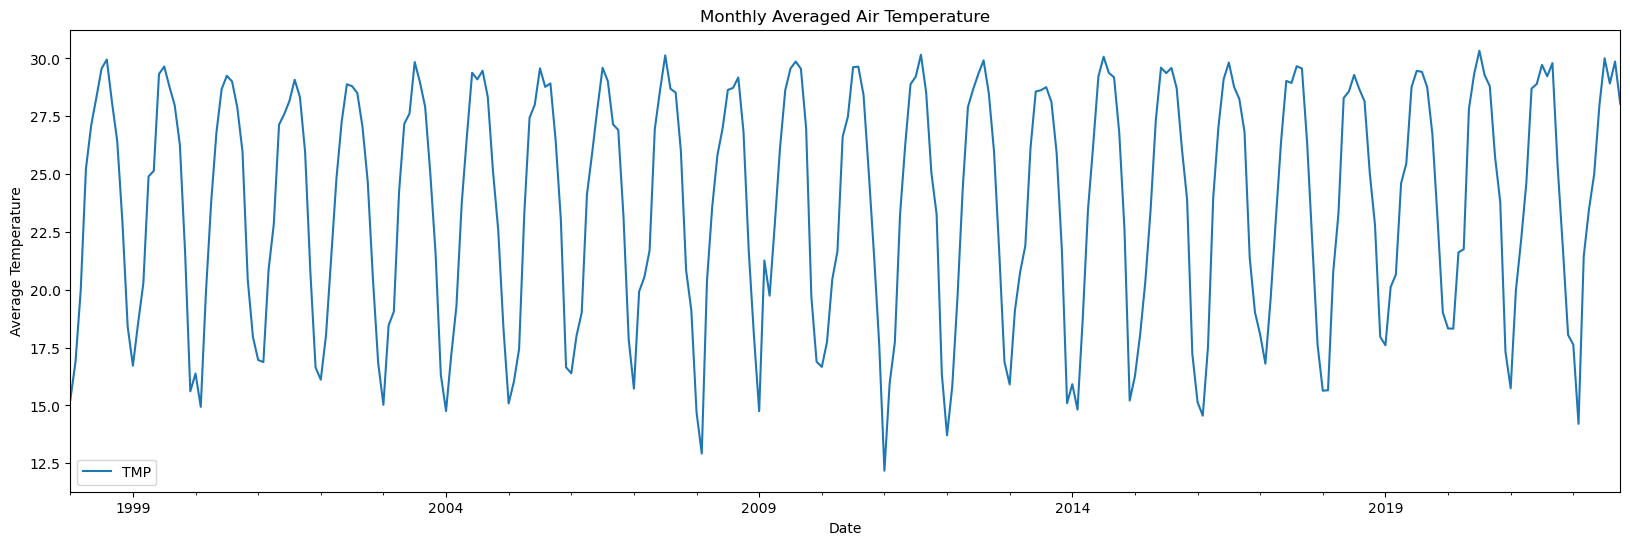

In [47]:
# 根据groupby函数来对年份和月份进行分组求出TMP的每年每月的月平均温度
monthly_ave_tem = df_baoan_tem_filt.groupby([df_baoan_tem_filt.index.year,df_baoan_tem_filt.index.month]).mean()
monthly_ave_tem = monthly_ave_tem.rename_axis(['Year', 'Month']) #
monthly_ave_tem = monthly_ave_tem.reset_index()
monthly_ave_tem['Date'] = pd.to_datetime(monthly_ave_tem['Year'].astype(str)+'-'+monthly_ave_tem['Month'].astype(str),format='%Y-%m')

monthly_ave_tem = monthly_ave_tem.set_index('Date')


fig, ax = plt.subplots(figsize=(20, 6))
monthly_ave_tem[['TMP']].plot(ax=ax)
ax.set_title('Monthly Averaged Air Temperature')
ax.set_xlabel('Date')
ax.set_ylabel('Average Temperature')

Trend：气温的变化主要是季节性的，而在过去25年中气温变化保持相对稳定，没有显著的趋势变化。

# 3. Global collection of hurricanes

In [49]:
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED',' ']) # WMO_WIND、WMO_PRES、WMO_AGENCY中空格字符' '为缺失数据

df.head()

D:\temp\Temp\ipykernel_18560\2131633225.py:1: DtypeWarning: Columns (5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN,NaN,main,43,0.0,__________O___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN,NaN,main,0,0.0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN,NaN,main,0,0.0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN,NaN,main,0,0.0,__________P___
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN,NaN,main,0,0.0,__________O___


## 3.1 

In [51]:
df_wind = df[['SID','NAME','WMO_WIND']] # 将所需要的列提取出来
df_wind = df_wind[df_wind['WMO_WIND'].notna()] # 剔除WMO_WIND缺失的数据
df_wind.loc[:,'WMO_WIND'] = pd.to_numeric(df_wind['WMO_WIND'],errors='coerce') # 确保其为数值型
# 根据SID分组后用 idxmax 找到 WMO_WIND 最大值的索引，找到索引所在的行，并据此进行排序
df_wind.loc[df_wind.groupby('SID')['WMO_WIND'].idxmax()].sort_values(by='WMO_WIND',ascending=False).head(10)

,SID,NAME,WMO_WIND
665955,2015293N13266,PATRICIA,185.0
427637,1980214N11330,ALLEN,165.0
689333,2019236N10314,DORIAN,160.0
482075,1988253N12306,GILBERT,160.0
605747,2005289N18282,WILMA,160.0
178210,1935241N23291,NaN,160.0
552460,1997253N12255,LINDA,160.0
676144,2017242N16333,IRMA,155.0
560438,1998295N12284,MITCH,155.0
629195,2009288N07267,RICK,155.0


## 3.2

<Axes: xlabel='NAME', ylabel='WMO_WIND (knots)'>

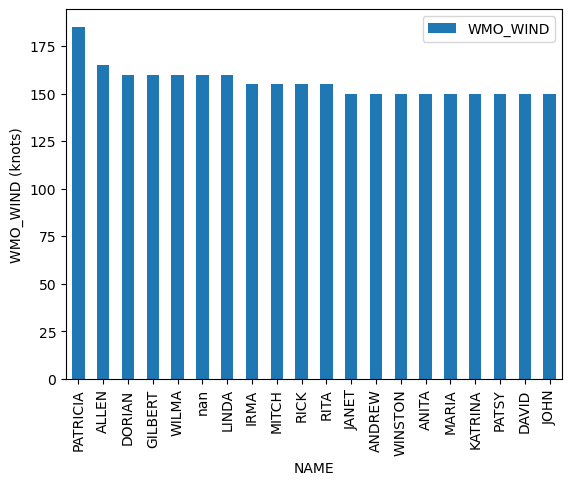

In [53]:
# 根据 WMO_WIND 进行排序，并把NAME作为index
df_wind_ls = df_wind[['NAME','WMO_WIND']].loc[df_wind.groupby('SID')['WMO_WIND'].idxmax()].sort_values(by='WMO_WIND',ascending=False).set_index('NAME')
# 绘制最强的20个hurricanes图，横坐标为飓风名称
df_wind_ls.iloc[:20].plot(kind='bar',ylabel='WMO_WIND (knots)')

## 3.3

<Axes: xlabel='BASIN', ylabel='Number of datapoints'>

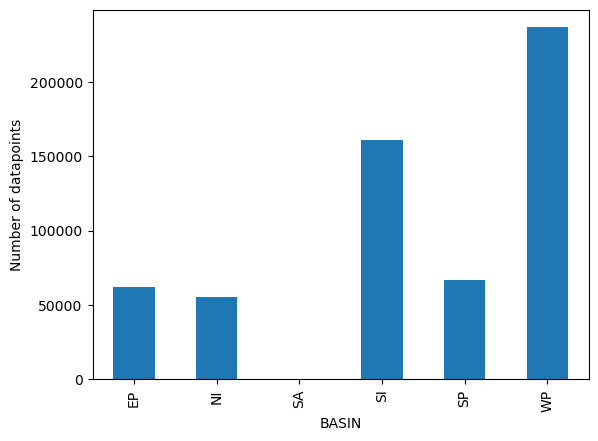

In [55]:
# 根据BSIN进行分组后，用size输出行数
df.groupby(by='BASIN').size().plot(kind='bar',ylabel='Number of datapoints')

## 3.4

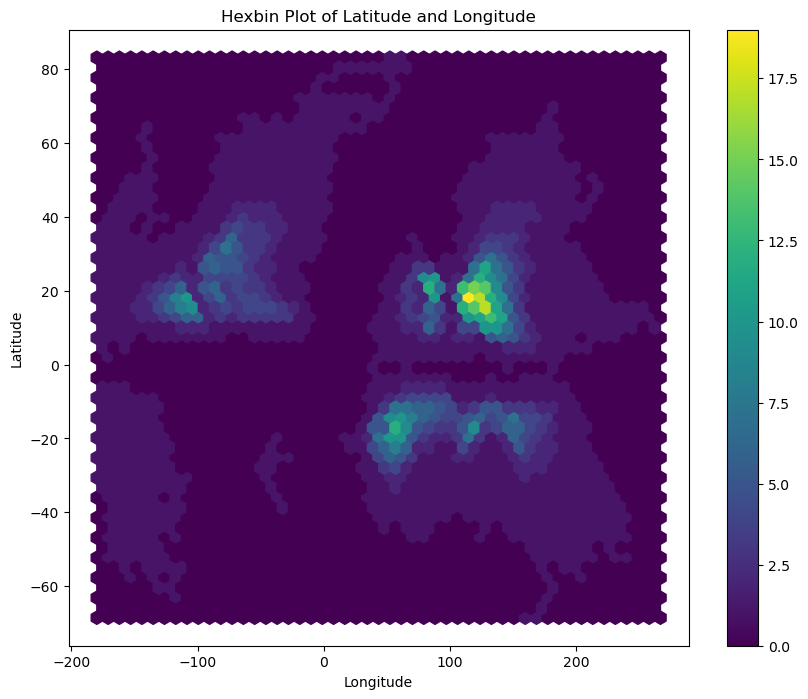

In [57]:
plt.figure(figsize=(10, 8))
hb = plt.hexbin(df['LON'],df['LAT'],bins=20, gridsize=50, cmap='viridis') 

plt.colorbar(hb)
plt.title('Hexbin Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

## 3.5

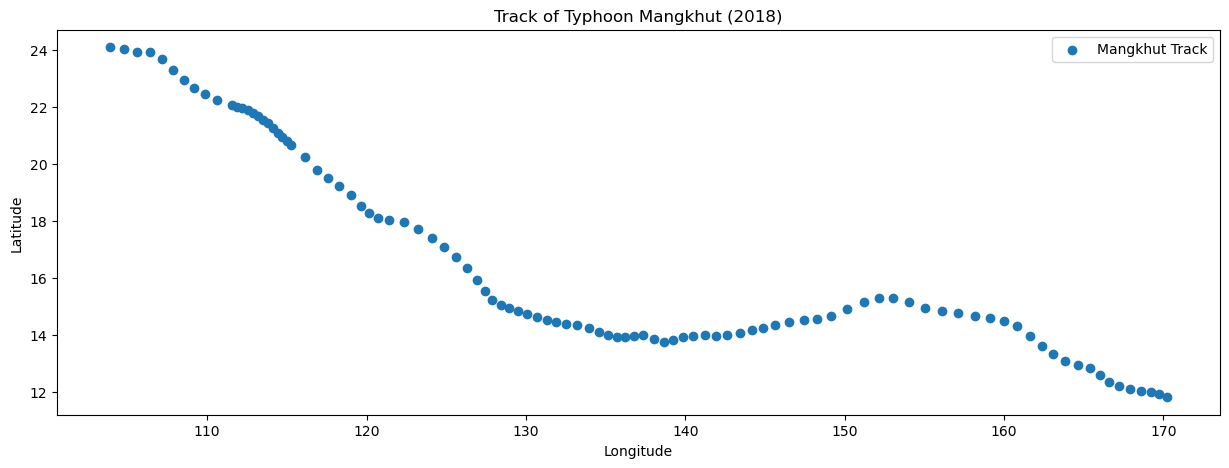

In [59]:
# 找到2018年发生的名为'MANGKHUT'的台风数据
df_MANGKHUT = df[(df['NAME'] == 'MANGKHUT') & (df['ISO_TIME'].dt.year == 2018)]

plt.figure(figsize=(15, 5))
plt.scatter(df_MANGKHUT['LON'], df_MANGKHUT['LAT'], label='Mangkhut Track')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Track of Typhoon Mangkhut (2018)')
plt.legend()

plt.show()

## 3.6

In [61]:
df_WPEP_1970 = df[ ((df['BASIN']=='WP') | (df['BASIN']=='EP')) & (df['ISO_TIME'].dt.year >= 1970)]
df_WPEP_1970

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006.0,tokyo,main,1088,1088.0,_OO___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,NaN,NaN,main,1109,1109.0,_PP___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002.0,tokyo,main,1143,1143.0,_OO___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,NaN,NaN,main,1171,1168.0,_PP___________
350398,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998.0,tokyo,main,1182,1179.0,_OO___________
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707085,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 15:00:00,TS,13.99570,-90.294,NaN,NaN,NaN,PROVISIONAL,0,0.0,P_____________
707086,2022275N10316,2022,76,EP,MM,JULIA,2022-10-10 18:00:00,NR,14.50000,-91.000,NaN,NaN,NaN,PROVISIONAL,0,NaN,O_____________
707174,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 12:00:00,NR,15.20000,151.300,NaN,NaN,NaN,PROVISIONAL,1985,1974.0,O_____________
707175,2022286N15151,2022,80,WP,MM,NaN,2022-10-12 15:00:00,NR,15.05000,151.325,NaN,NaN,NaN,PROVISIONAL,1974,1952.0,P_____________


## 3.7

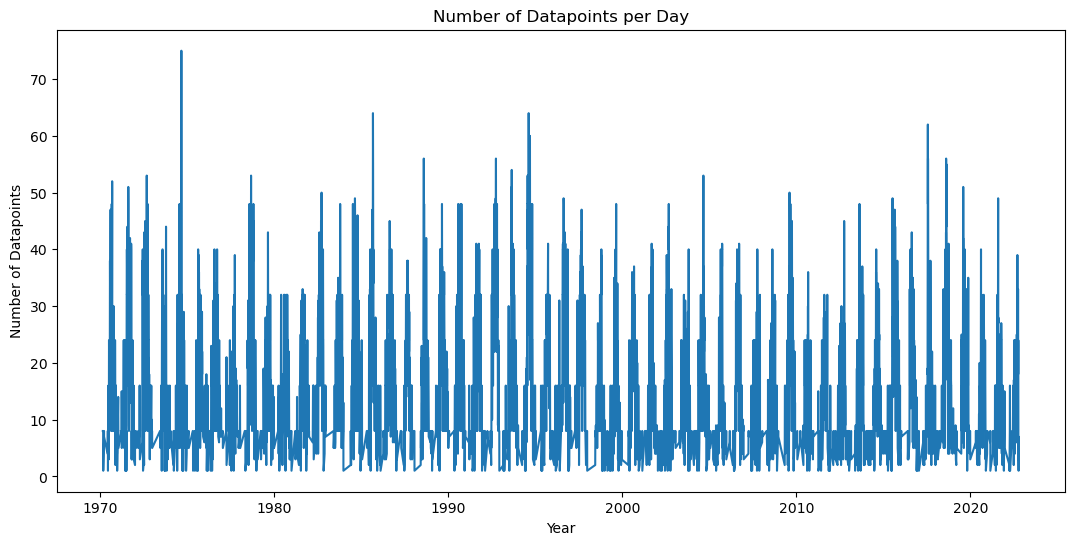

In [63]:
df_WPEP_1970.groupby(by=df_WPEP_1970['ISO_TIME'].dt.date).size().plot(figsize=(13,6))

plt.xlabel('Year')
plt.ylabel('Number of Datapoints')
plt.title('Number of Datapoints per Day')

plt.show()

折线图显示比较乱，下面用条形图展示

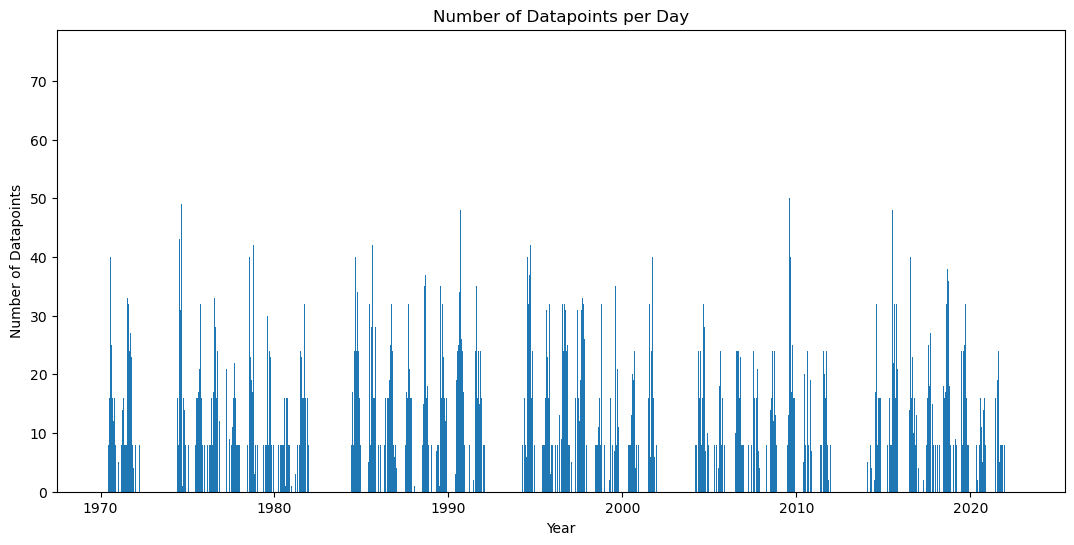

In [65]:
data_per_day = pd.DataFrame(df_WPEP_1970.groupby(by=df_WPEP_1970['ISO_TIME'].dt.date).size(),columns = ['Number of Datapoints'])
plt.figure(figsize=(13,6))
plt.bar(data_per_day.index,data_per_day['Number of Datapoints'])

plt.xlabel('Year')
plt.ylabel('Number of Datapoints')
plt.title('Number of Datapoints per Day')

plt.show()

## 3.8

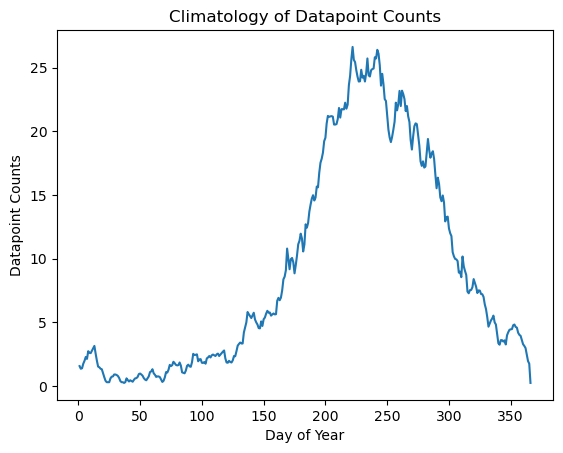

In [66]:
Count_clima = df_WPEP_1970.groupby(by=df_WPEP_1970['ISO_TIME'].dt.dayofyear).size() / len(df_WPEP_1970['ISO_TIME'].dt.year.unique())
Count_clima = Count_clima.rename_axis(['Day']) # 将其index定义为'Day'，以便后续处理
Count_clima.plot()
### Note: 筛选后的数据日期从1970-02-19到2022-10-12，直接除并不是最精确的，不是所有日期的计数都一样

plt.xlabel('Day of Year')
plt.ylabel('Datapoint Counts')
plt.title('Climatology of Datapoint Counts')

plt.show()

## 3.9

In [69]:
# 根据年和dayofyear分组，size()计算行数，得到各个年份中每天的原始数据数
per_day_origin = df_WPEP_1970.groupby( [df_WPEP_1970['ISO_TIME'].dt.year,df_WPEP_1970['ISO_TIME'].dt.dayofyear] ).size().rename_axis(['Year','Day'])

# 将原始数据集缺失的天数以0补充，并在每年每天的Datapoint Counts减去3.8中计算得到的 Climatology of Datapoint Counts
zero_366 = pd.Series(0,index=pd.Index(range(1,367),name='Day')) # 减去 366 day 的可以将缺失的天数以NaN的数据补充，如有数值：原始值-0=原始值
df_s = pd.DataFrame(columns=['Year','Day','Number']) # 定义一个空的df数据用以存储计算出偏差后的数据集
for year in list(df_WPEP_1970['ISO_TIME'].dt.year.unique()): # 遍历数据集中存在的每一个年份
    if ((year%4 == 0) and (year%100 != 0)) or (year%400==0):  # 闰年有366天
        per_day_0 = per_day_origin.loc[year]-zero_366.loc[1:366]  # 减去 366 day 的可以将缺失的天数以NaN的数据补充
        per_day_0.fillna(0,inplace=True) # 缺失的数值为 0
        per_day_ano = pd.DataFrame(per_day_0-Count_clima.loc[1:366],columns=['Number']).reset_index() # 将该year的原始数值-多年平均的Count_clima，即可用于反映异常anomaly
        per_day_ano['Year'] = year # 补充年份数据
        df_s = pd.concat([df_s,per_day_ano], axis=0, ignore_index=True) 
    else:  # 其余为平年，有365天
        per_day_0 = per_day_origin.loc[year]-zero_366.loc[1:365]  
        per_day_0.fillna(0,inplace=True) # 缺失的数值为 0
        per_day_ano = pd.DataFrame(per_day_0-Count_clima.loc[1:365],columns=['Number']).reset_index()
        per_day_ano['Year'] = year # 补充年份数据
        df_s = pd.concat([df_s,per_day_ano], axis=0, ignore_index=True)  
df_s # 得到anomaly of daily counts from the climatology

### Note: 这里的daily counts from climatology 是平均值！从3.7看，1970年是没有1月1日的数据的，Year1970 Day1的值是不是有误

D:\temp\Temp\ipykernel_18560\1467747341.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_s = pd.concat([df_s,per_day_ano], axis=0, ignore_index=True)


,Year,Day,Number
0,1970,1,-1.566038
1,1970,2,-1.358491
2,1970,3,-1.396226
3,1970,4,-1.754717
4,1970,5,-1.981132
...,...,...,...
19353,2022,361,-3.150943
19354,2022,362,-2.981132
19355,2022,363,-2.490566
19356,2022,364,-1.962264


In [71]:
# 将其日期转换回datetime的形式
per_day = df_s[['Number']]
per_day['Date'] = pd.to_datetime(df_s['Year'].astype(str) + '-' + df_s['Day'].astype(str),format='%Y-%j')
per_day = per_day.set_index('Date')
per_day

D:\temp\Temp\ipykernel_18560\268700868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  per_day['Date'] = pd.to_datetime(df_s['Year'].astype(str) + '-' + df_s['Day'].astype(str),format='%Y-%j')


,Number
Date,
1970-01-01,-1.566038
1970-01-02,-1.358491
1970-01-03,-1.396226
1970-01-04,-1.754717
1970-01-05,-1.981132
...,...
2022-12-27,-3.150943
2022-12-28,-2.981132
2022-12-29,-2.490566


## 3.10

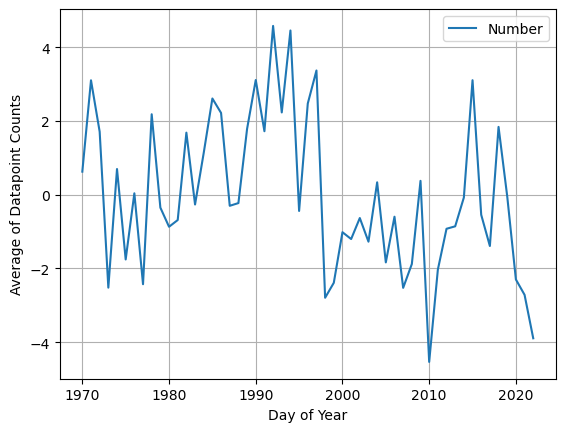

In [73]:
# 将异常值按年进行分组平均
per_day.groupby(by=per_day.index.year).mean().plot()
plt.grid(True)

plt.xlabel('Day of Year')
plt.ylabel('Average of Datapoint Counts')

plt.show()

D:\temp\Temp\ipykernel_18560\3744190171.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  per_day.resample('Y').mean().plot()


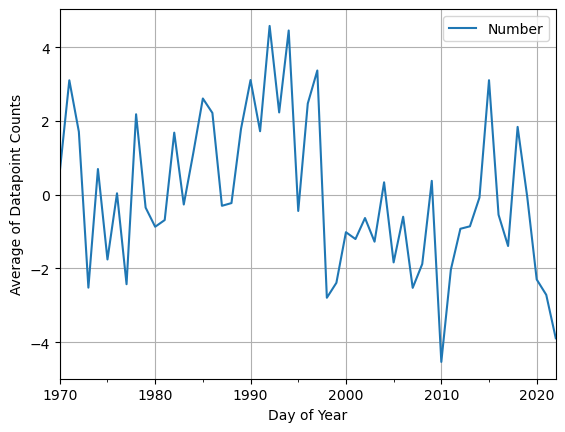

In [75]:
# 利用resample函数实现
per_day.resample('Y').mean().plot()

plt.grid(True)

plt.xlabel('Day of Year')
plt.ylabel('Average of Datapoint Counts')

plt.show()

结果：图中显示，1971、1978、1985、1986、1990、1992、1993、1994、1995、1996、1997、2015年份飓风活动相对较为活跃（Datapoint Counts>2）；1992、1994年非常活跃（Datapoint Counts>4）。

# 4. Explore a data set

## 4.1 

In [77]:
# 下载了站点“JAN MAYEN NOR NAVY, NO”（01001099999）在2023年一年中的气象数据
df = pd.read_csv('01001099999-GLOBAL SURFACE SUMMARY OF DAY DATA.csv',
                parse_dates=['DATE'],
                na_values=[9999.9,999.9,99.99])   # 数据中 9999.9,999.9,99.99 均表示数据缺失
# MIN_ATTRIBUTES中，空白表示最低温度是从明确的最低温度报告中获取的，*表示最低温度是从小时数据中推导出来的
df.head(10)

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,TEMP_ATTRIBUTES,DEWP,DEWP_ATTRIBUTES,...,MXSPD,GUST,MAX,MAX_ATTRIBUTES,MIN,MIN_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNDP,FRSHTT
0,1001099999,2023-01-01,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",18.1,24,10.3,24,...,27.6,51.3,23.5,,12.6,,0.29,G,NaN,1000
1,1001099999,2023-01-02,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",25.8,24,20.8,24,...,16.7,24.7,34.3,,19.4,,0.05,G,NaN,1000
2,1001099999,2023-01-03,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",35.8,24,30.9,24,...,26.4,34.2,37.6,,24.6,,0.07,G,NaN,10000
3,1001099999,2023-01-04,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",37.0,24,32.1,24,...,21.2,33.0,37.8,,35.6,,0.04,G,NaN,10000
4,1001099999,2023-01-05,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",35.4,24,29.7,24,...,20.8,26.0,37.4,,32.2,,0.01,G,NaN,10000
5,1001099999,2023-01-06,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",32.7,24,29.4,24,...,24.3,30.1,34.9,,30.2,,0.03,G,NaN,11000
6,1001099999,2023-01-07,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",34.7,24,30.5,24,...,23.1,31.5,35.6,,32.0,,0.04,G,NaN,1000
7,1001099999,2023-01-08,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",35.2,24,28.1,24,...,25.4,35.2,38.7,,33.3,,0.08,G,NaN,0
8,1001099999,2023-01-09,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",34.0,24,30.0,24,...,23.1,34.2,39.2,,31.6,,0.02,G,NaN,11000
9,1001099999,2023-01-10,70.933333,-8.666667,9.0,"JAN MAYEN NOR NAVY, NO",31.6,24,29.2,24,...,27.8,34.4,33.3,,30.6,,0.02,G,NaN,11000


## 4.2

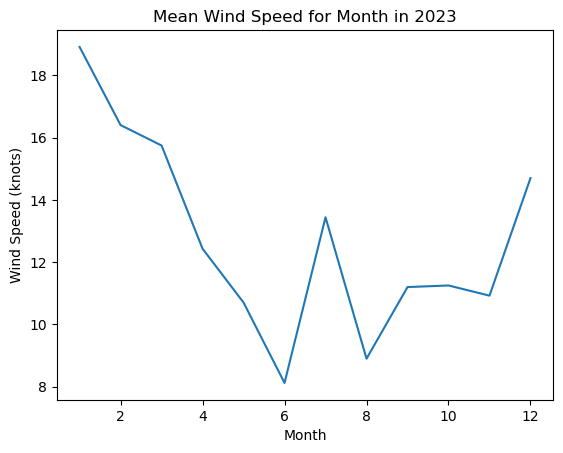

In [79]:
# WDSP为每日的平均风速绘制月平均风速在2023年一年中的变化情况
# WDSP_ATTRIBUTES为每日测量次数，认为大于等于20次的观测值平均对当天的平均风速能有较好的代表
(df[df['WDSP_ATTRIBUTES']>=20].groupby(by=df['DATE'].dt.month))['WDSP'].mean().plot()

plt.xlabel('Month')
plt.ylabel('Wind Speed (knots)')
plt.title('Mean Wind Speed for Month in 2023')

plt.show()

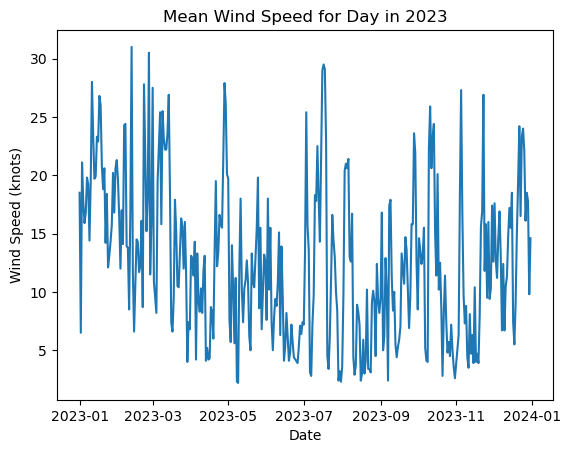

In [81]:
# 若绘制该地区一年中每日风速的情况则如下图所示
(df[df['WDSP_ATTRIBUTES']>=20].groupby(by=df['DATE'].dt.date))['WDSP'].mean().plot()

plt.xlabel('Date')
plt.ylabel('Wind Speed (knots)')
plt.title('Mean Wind Speed for Day in 2023')

plt.show()

## 4.3

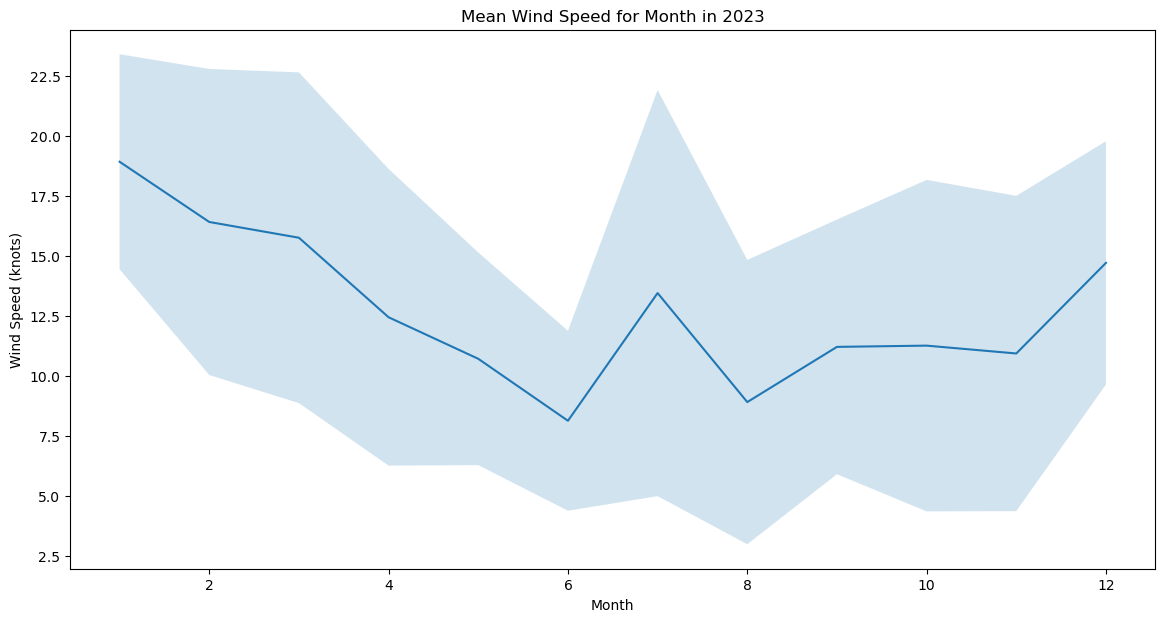

In [83]:
# 计算每月风速的平均值
mean_wind_speed = (df[df['WDSP_ATTRIBUTES']>=20].groupby(by=df['DATE'].dt.month))['WDSP'].mean()

# 计算每月风速的标准差
std_dev_wind_speed = ( df[df['WDSP_ATTRIBUTES']>=20].groupby(by=df['DATE'].dt.month) )['WDSP'].std()

# 计算标准差的上下界
lower_bound = mean_wind_speed-std_dev_wind_speed
upper_bound = mean_wind_speed+std_dev_wind_speed

plt.figure(figsize=(14, 7))
plt.plot(mean_wind_speed, label='Mean Wind Speed')
plt.fill_between(mean_wind_speed.index, lower_bound, upper_bound, alpha=0.2, label='Error Interval')

plt.xlabel('Month')
plt.ylabel('Wind Speed (knots)')
plt.title('Mean Wind Speed for Month in 2023')

plt.show()

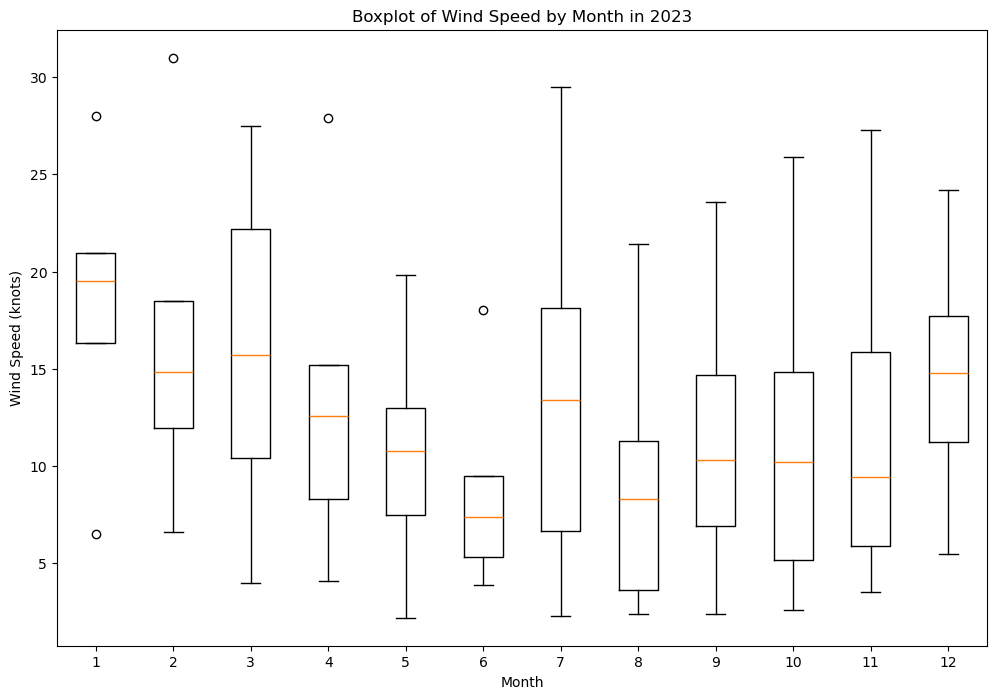

,min_wind_speed,Q1_wind_speed,median_wind_speed,Q3_wind_speed,max_wind_speed
0,6.5,16.350,19.50,20.950,28.0
1,6.6,11.950,14.85,18.475,31.0
2,4.0,10.425,15.70,22.200,27.5
3,4.1,8.300,12.55,15.200,27.9
4,2.2,7.500,10.80,13.000,19.8
5,3.9,5.300,7.40,9.500,18.0
6,2.3,6.650,13.40,18.150,29.5
7,2.4,3.650,8.30,11.300,21.4
8,2.4,6.900,10.30,14.700,23.6
9,2.6,5.150,10.20,14.850,25.9


In [85]:
# 计算风速的中位数
median_wind_speed =  (df[df['WDSP_ATTRIBUTES']>=20].groupby(by=df['DATE'].dt.month))['WDSP'].median().tolist()

# 风速的最大值和最小值
min_wind_speed = (df[df['WDSP_ATTRIBUTES']>=20].groupby(by=df['DATE'].dt.month))['WDSP'].min().tolist()
max_wind_speed = (df[df['WDSP_ATTRIBUTES']>=20].groupby(by=df['DATE'].dt.month))['WDSP'].max().tolist()

# 风速的四分位点
Q1_wind_speed = (df[df['WDSP_ATTRIBUTES']>=20].groupby(by=df['DATE'].dt.month))['WDSP'].quantile(0.25).tolist()
Q3_wind_speed = (df[df['WDSP_ATTRIBUTES']>=20].groupby(by=df['DATE'].dt.month))['WDSP'].quantile(0.75).tolist()

# 将上述统计量汇总到一个表中
stats_df = pd.DataFrame({
    'min_wind_speed': min_wind_speed,
    'Q1_wind_speed': Q1_wind_speed,
    'median_wind_speed': median_wind_speed,
    'Q3_wind_speed': Q3_wind_speed,
    'max_wind_speed': max_wind_speed})

# 绘制箱线图
plt.figure(figsize=(12, 8))
plt.boxplot(list(zip(min_wind_speed, Q1_wind_speed, median_wind_speed, Q3_wind_speed, max_wind_speed)), vert=True)
plt.title('Boxplot of Wind Speed by Month in 2023')
plt.xlabel('Month')
plt.ylabel('Wind Speed (knots)')

plt.show()

stats_df 

根据2023年 JAN MAYEN NOR NAVY, NO 的风速数据，该地区风速在一年中存在明显的季节性变化，冬季风速相对较高，而夏季的6月和8月风速相对较低。全年风速波动较大，尤其是7月份，表现出较高的不确定性和一些极端风速值。整体来看，风速的分布并不均匀，某些月份如1、2、4、6月出现了离群点，这可能与特定的天气事件有关。

<Axes: ylabel='Frequency'>

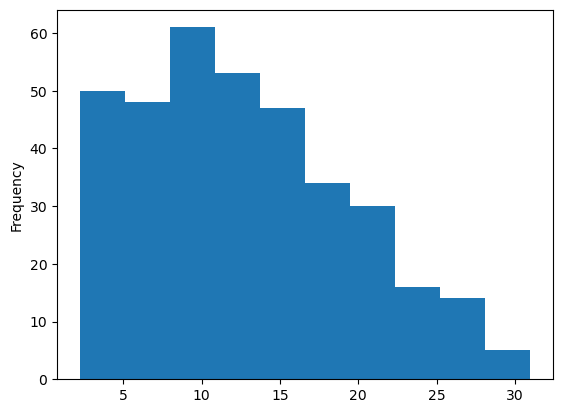

In [87]:
# 分析风速的频度分布
df[df['WDSP_ATTRIBUTES']>=20]['WDSP'].plot(kind='hist')

风速主要集中在 0~15 knots